1강 

In [1]:
import cv2

In [2]:
print(cv2.__version__)

4.4.0


In [3]:
import cv2

img1 = cv2.imread('apple.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('apple.jpg', cv2.IMREAD_COLOR)

print('type(img): ', type(img1))

type(img):  <class 'numpy.ndarray'>


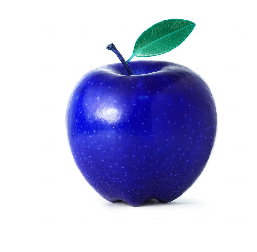

In [6]:
import matplotlib.pyplot as plt
import cv2 

imgBGR = cv2.imread('apple.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

plt.axis('off')
#plt.imshow(imgRGB)
plt.imshow(imgBGR)

plt.show()

In [5]:
import cv2 
import sys

img1=cv2.imread('apple.jpg')

cv2.namedWindow('image1', cv2.WINDOW_NORMAL)
cv2.imshow('image1', img1)
cv2.resizeWindow('image1', 960, 360)
cv2.moveWindow('image1',960,360)

cv2.waitKey()
cv2.destroyAllWindows()


In [7]:
# page 48
import cv2

img = cv2.imread('apple.jpg', cv2.IMREAD_COLOR)
cv2.imshow("img",img)

while True:
    if cv2.waitKey() == ord('Q'):
        break

cv2.destroyAllWindows()

In [9]:
import cv2

img1 = cv2.imread('apple.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('apple.jpg', cv2.IMREAD_COLOR)

print('type(img2):', type(img2))

# img2 는 컬러영상이므로 img2.shape = (h,w,3) 형태이다. 따라서 앞의 두 개를 h, w 로 사용해야 한다

h, w = img2.shape[:2]

if len(img1.shape) == 2:
    print('img1 is a grayscale image', img1.shape)
elif len(img1.shape) == 3:
    print('img1 is a truecolor image', img1.shape)


type(img2): <class 'numpy.ndarray'>
img1 is a grayscale image (893, 894)


In [10]:
img1 = cv2.imread('apple.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('apple.jpg', cv2.IMREAD_COLOR)

#220x200
img1[80:120, 80:120] = (128)
img2[40:180,40:160] = (100,100,100)

cv2.imshow("img1", img1)
cv2.imshow("img2", img2)

cv2.waitKey()
cv2.destroyAllWindows()


In [11]:
import cv2
img = cv2.imread('apple.jpg', cv2.IMREAD_COLOR)
cv2.line(img, (30,30), (190,190), (0, 255, 0), 5, cv2.LINE_4)
cv2.line(img, (30,190), (190,30), (0, 255, 0), 5, cv2.LINE_4)
cv2.putText(img, 'NO More', (50, 100), cv2.FONT_HERSHEY_PLAIN,2, (0,0,0), 1, cv2.LINE_AA)
cv2.putText(img, 'Apples', (60, 120), cv2.FONT_HERSHEY_PLAIN,2, (0,0,0), 1, cv2.LINE_AA)
cv2.imshow("img", img)

cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
import cv2

img1 = cv2.imread('1.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('2.jpg', cv2.IMREAD_COLOR)
img3 = cv2.imread('3.jpg', cv2.IMREAD_COLOR)
img4 = cv2.imread('4.jpg', cv2.IMREAD_COLOR)

img_list = [img1, img2, img3, img4]

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.resizeWindow('image', 1920, 1080)
cv2.moveWindow('image',2000,10)

cnt = len(img_list)
idx = 0

while True:
    img = img_list[idx]    
    cv2.imshow('image', img)
    if cv2.waitKey(100) == 27:
        break
    idx += 1
    if idx >= cnt:
        idx = 0

cv2.destroyAllWindows()


In [13]:
import sys
import numpy as np
import cv2

oldx = oldy = -1

def mouse_fn(event, x, y, flags, param):
    global oldx, oldy

    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        print('start (EVENT_LBUTTONDOWN): %d, %d' % (x, y))
        cv2.putText(img, 'down', (x, y), cv2.FONT_HERSHEY_PLAIN,1, (255,0,0), 1, cv2.LINE_AA)

    elif event == cv2.EVENT_LBUTTONUP:
        print('end (EVENT_LBUTTONUP): %d, %d' % (x, y))
        cv2.putText(img, 'up', (x, y), cv2.FONT_HERSHEY_PLAIN,1, (0,255,0), 1, cv2.LINE_AA)

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(img, (x, y), 5,  (0, 0, 255), -1)
            cv2.imshow('image', img)

img = np.ones((480, 640, 3), dtype=np.uint8) * 255

cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_fn, img)

cv2.imshow('image', img)
cv2.waitKey()

cv2.destroyAllWindows()

start (EVENT_LBUTTONDOWN): 185, 263
end (EVENT_LBUTTONUP): 228, 302


In [14]:
#트랙바를 이용한 grayscale 조절

import cv2
import numpy as np

def on_level_change(pos):
    value = pos * 8
    if value >= 255:
        value = 255
    img[:] = value
    cv2.imshow('image', img)

img = np.zeros((480, 640), np.uint8)

cv2.namedWindow('image')
cv2.createTrackbar('level', 'image', 0, 32, on_level_change)
cv2.imshow('image', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
import numpy as np
import cv2

def nothing(x):
    pass

frame = np.zeros((512, 512, 3), np.uint8)
cv2. namedWindow('frame')

cv2.createTrackbar('R', 'frame', 0, 255, nothing)
cv2.createTrackbar('G', 'frame', 0, 255, nothing)
cv2.createTrackbar('B', 'frame', 0, 255, nothing)

while True:
    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)
    if key == 27:
        break
    r = cv2.getTrackbarPos('R', 'frame')
    g = cv2.getTrackbarPos('G', 'frame')
    b = cv2.getTrackbarPos('B', 'frame')

    frame[:] = [b, g, r]

cv2.destroyAllWindows()


In [1]:
import sys
import numpy as np
import cv2

src1 = cv2.imread('3001.jpg', cv2.IMREAD_COLOR)
src2 = cv2.imread('3002.jpg', cv2.IMREAD_COLOR)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)

dst1 = cv2.add(src1, src2)
dst2 = cv2.subtract(src1,src2)
dst3 = cv2.addWeighted(src1, 0.2, src2, 0.8, 2)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
# bitwise 연산

import sys
import numpy as np
import cv2

src1 = cv2.imread('3001.jpg', cv2.IMREAD_GRAYSCALE)
#src1 = cv2.imread('bitwise.png', cv2.IMREAD_GRAYSCALE)

h, w = src1.shape
src2 = np.zeros((h,w), dtype = np.uint8)

for x in range(int(w/2)):
    for y in range(h):
        src2[y,x] = 255

        
cv2.imshow('src1', src1)
cv2.imshow('src2', src2)

bit_and = cv2.bitwise_and(src1, src2)
bit_or = cv2.bitwise_or(src1, src2)
bit_not = cv2.bitwise_not(src1)
bit_xor = cv2.bitwise_xor(src1, src2)

cv2.imshow('bit_and', bit_and)
cv2.imshow('bit_or', bit_or)
cv2.imshow('bit_not', bit_not)
cv2.imshow('bit_xor', bit_xor)


cv2.waitKey()
cv2.destroyAllWindows()


In [8]:
# RGB 색상 분리 및 결함
import cv2
import sys

src = cv2.imread('fruits.jpg', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

# 컬러 영상 속성 확인
print('src.shape:', src.shape)
print('src.dtype:', src.dtype)


#RGB의 색상 변환~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~```

# RGB 색 평면 분할
splits = cv2.split(src)

cv2.imshow('src', src)
cv2.imshow('B', splits[0])
cv2.imshow('G', splits[1])
cv2.imshow('R', splits[2])

cv2.waitKey()
cv2.destroyAllWindows()


src.shape: (734, 1100, 3)
src.dtype: uint8


In [9]:
# median filter 구하기(cv2.filter2D)

import numpy as np
import cv2

src = cv2.imread('fruits.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3, 3), dtype = np.float32) / 9.
kernel2 = np.ones((5, 5), dtype = np.float32) / 25.

dst1 = cv2.filter2D(src, -1, kernel)
dst2 = cv2.filter2D(src, -1, kernel2)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()



In [10]:
# median filter 구하기(cv2.filter2D)

import numpy as np
import cv2

def nothing(x):
    pass

src = cv2.imread('fruits.jpg', cv2.IMREAD_GRAYSCALE)
cv2. namedWindow('frame')
cv2.imshow('frame', src)
cv2.createTrackbar('Blur', 'frame', 0, 20, nothing)

while True:
    
    key = cv2.waitKey(1)
    if key == 27:
        break
        
    b = cv2.getTrackbarPos('Blur', 'frame')
    k = b*2+1
    
    dst1 = cv2.blur(src, (k,k))
    cv2.imshow('frame', dst1)

cv2.waitKey()
cv2.destroyAllWindows()



In [11]:
# mode 1:line, 2:rectangle, 3:circle, 4:free

import cv2
import numpy as np

x0, y0 = 0, 0
draw = False
mode = 1
img = np.zeros((480,640,3), np.uint8)
img0 = np.copy(img)

def on_mouse(event, x, y, flags, param):
	global x0, y0, draw, mode, img0, img

	if event == cv2.EVENT_LBUTTONDOWN:
		draw = True
		x0, y0 = x, y
	elif draw and event == cv2.EVENT_MOUSEMOVE:
		if mode < 4: np.copyto(img, img0)
		if mode == 1:
			cv2.line(img, (x0,y0), (x,y), (0,0,255), 2)
		elif mode == 2:
			cv2.rectangle(img, (x0,y0), (x,y), (0,255,0), 2)
		elif mode == 3:
			r = np.sqrt((x-x0)*(x-x0) + (y-y0)*(y-y0))
			cv2.circle(img, (x0,y0), int(r), (0,255,255), 2)
		elif mode == 4:
			cv2.line(img, (x0,y0), (x,y), (255,0,255), 2)
			x0, y0 = x, y
	elif event == cv2.EVENT_LBUTTONUP:
		draw = False
		np.copyto(img0, img)

cv2.namedWindow('img')
cv2.setMouseCallback('img', on_mouse)

while True:
	cv2.imshow('img', img)
	key = cv2.waitKey(30)
	if key > 48 and key < 53: mode = key - 48
	elif key == 27: break
    
cv2.destroyAllWindows()


In [12]:
import cv2

cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    _, frame = cap.read()
    cv2.putText(frame, 'width = '+str(width), (10, 15), cv2.FONT_HERSHEY_PLAIN,1,(0,255,0),1,cv2.LINE_AA)
    cv2.putText(frame, 'height = '+str(height), (10, 35), cv2.FONT_HERSHEY_PLAIN,1,(0,255,0),1,cv2.LINE_AA)
    cv2.putText(frame, 'fps = '+str(cap.get(cv2.CAP_PROP_FPS)), (10, 55), cv2.FONT_HERSHEY_PLAIN,1,(0,255,0),1,cv2.LINE_AA)

    cv2.imshow('video', frame)
    if cv2.waitKey(30) == 27: break

cap.release()
cv2.destroyAllWindows()

In [13]:
import cv2
cap = cv2.VideoCapture(0) #비디오캡쳐
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) #현재 동영상 폭 값 불러오기
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) #현재 동영상 높이 값 불러오기
fourcc = cv2.VideoWriter_fourcc(*'XVID')
writer = cv2.VideoWriter('cap0.avi', fourcc, 10, (width, height))
while True: 
    ret, frame = cap.read() #비디오캡쳐하여 frame 이라는 변수로 전달, ret는 성공메세지
    cv2.putText(frame,'width = '+str(width),(10,15),cv2.FONT_HERSHEY_PLAIN,1,(0,255,0),1,cv2.LINE_AA)
    cv2.putText(frame,'height = '+str(height),(10,35),cv2.FONT_HERSHEY_PLAIN,1,(0,255,0),1,cv2.LINE_AA)
    cv2.putText(frame,'fps = '+str(cap.get(cv2.CAP_PROP_FPS)),(10,55),cv2.FONT_HERSHEY_PLAIN,1,(0,255,0),1,cv2.LINE_AA)
    writer.write(frame) #========================================
    cv2.putText(frame,'Recodring',(10,75),cv2.FONT_HERSHEY_PLAIN,1,(0,0,255),1,cv2.LINE_AA)
    cv2.imshow('video_write', frame) #frame 내용을 video 윈도우에 뿌림
    if cv2.waitKey(30) == 27: break #ESC 키를 누르면 종료
writer.release()
cap.release()
cv2.destroyAllWindows()

In [14]:
import cv2
cap = cv2.VideoCapture('cap0.avi') #비디오캡쳐

while True: 
    ret, frame = cap.read() #비디오캡쳐하여 frame 이라는 변수로 전달, ret는 성공메세지
    if ret:
        cv2.imshow('video_play', frame) #frame 내용을 video 윈도우에 뿌림
    else:break
    if cv2.waitKey(30) == 27: break #ESC 키를 누르면 종료        
cap.release()
cv2.destroyAllWindows()

In [15]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('fruits.jpg', cv2.IMREAD_GRAYSCALE)

print('img:', img.shape, img.dtype)
print('img.ravel()', img.ravel().shape, img.ravel().dtype)

# pyplot 을 사용한 히스토그램
plt.hist(img.ravel(), 256, [0,256]) # 256개의 상자, [0,256] 값에 대해서 계산
plt.xlim([0,256])
plt.show()

# 이미지의 0번째 채널을 256 개 상자를 사용하여 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0,256])
print('hist :', hist.shape, hist.dtype)
plt.plot(hist)
plt.xlim([0,256])
plt.show()

cv2.imshow('temp', img)
cv2.waitKey()
cv2.destroyAllWindows()

img: (734, 1100) uint8
img.ravel() (807400,) uint8


<Figure size 640x480 with 1 Axes>

hist : (256, 1) float32


<Figure size 640x480 with 1 Axes>

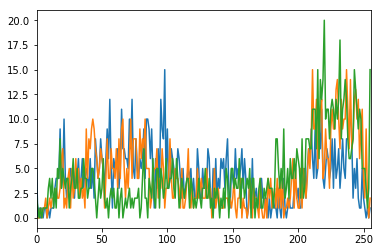

In [16]:
# show histogram for each channel

import cv2
from matplotlib import pyplot as plt

img = cv2.imread('fruits.jpg', cv2.IMREAD_COLOR)
split = cv2.split(img)

# 루프를 세번 돌며 각각의 컬러별로 히스토그램 계산
for i in split:
	hist = cv2.calcHist(i, [0], None, [256], [0,256])
	plt.plot(hist)
	plt.xlim([0,256])

plt.show()

In [1]:
import cv2
from matplotlib import pyplot as plt

img0 = cv2.imread('night.jpg', cv2.IMREAD_GRAYSCALE)
# 히스토그램을 평평하게 변형한 이미지
img1 = cv2.equalizeHist(img0)

cv2.namedWindow('img0', cv2.WINDOW_NORMAL)
cv2.namedWindow('img1', cv2.WINDOW_NORMAL)
cv2.imshow('img0', img0)
cv2.imshow('img1', img1)
cv2.waitKey()

plt.figure(figsize=(14,5))

#원본 히스토그램, 상자수 32
plt.subplot(1,2,1)
plt.hist(img0.ravel(), 32, [0,256])
plt.xlim([0,256])

#평평해진 히스토그램, 상자수 32
plt.subplot(1,2,2)
plt.hist(img1.ravel(), 32, [0,256])
plt.xlim([0,256])

plt.show()

<Figure size 1400x500 with 2 Axes>

In [2]:
# color image histogram equalization

import cv2

img = cv2.imread('night.jpg', cv2.IMREAD_COLOR)

#컬러별로 분리한후 각각 히스토그램 평평하게 변환
b, g, r = cv2.split(img)
b1 = cv2.equalizeHist(b)
g1 = cv2.equalizeHist(g)
r1 = cv2.equalizeHist(r)
img_bgr_eq = cv2.merge((b1,g1,r1)) #변형된 각각 채널을 합침

# HSV 컬러공간으로 변환후 Value 채널만 평평히
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v1 = cv2.equalizeHist(v)
hsv1 = cv2.merge((h,s,v1)) #평평해진 Value 채널로 대체
img_hsv_eq = cv2.cvtColor(hsv1, cv2.COLOR_HSV2BGR)

# YCrCb 컬러공간으로 변환후 Y 채널만 평평히
YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
y, r, b = cv2.split(YCrCb)
y1 = cv2.equalizeHist(y)
Y1CrCb = cv2.merge((y1,r,b)) #평평해진 Y 채널로 대체
img_YCrCb_eq = cv2.cvtColor(Y1CrCb, cv2.COLOR_YCrCb2BGR)

cv2.namedWindow('img_ori', cv2.WINDOW_NORMAL)
cv2.namedWindow('img_bgr_eq', cv2.WINDOW_NORMAL)
cv2.namedWindow('img_hsv_eq', cv2.WINDOW_NORMAL)
cv2.namedWindow('img_YCrCb_eq', cv2.WINDOW_NORMAL)

cv2.imshow('img_ori', img)
cv2.imshow('img_bgr_eq', img_bgr_eq) # 컬러가 변형되었습니다.
cv2.imshow('img_hsv_eq', img_hsv_eq) # 컬러가 변형되지 않습니다.
cv2.imshow('img_YCrCb_eq', img_YCrCb_eq) # 컬러가 변형되지 않습니다.
cv2.waitKey()

-1

In [3]:
import cv2

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.putText(frame, 'Recording...', (10, 15), cv2.FONT_HERSHEY_PLAIN,1,(0,0,255),1,cv2.LINE_AA)
    cv2.imshow('Camera0', frame)
    if cv2.waitKey(1) == ord('s'):        
        cv2.imwrite('CapImage.jpg', frame)
        print('Image Captured')
    elif cv2.waitKey(30) == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2

img=cv2.imread('gray.jpg', cv2.IMREAD_GRAYSCALE)

ret, thresh1 = cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,127,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,127,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,127,255, cv2.THRESH_TOZERO_INV)

cv2.imshow('img_ori', img)
cv2.imshow('img_BINARY', thresh1)
cv2.imshow('img_BINARY_INV', thresh2)
cv2.imshow('img_TRUNC', thresh3)
cv2.imshow('img_TOZERO', thresh4)
cv2.imshow('img_TOZERO_INV', thresh5)

cv2.waitKey()
cv2.destroyAllWindows()

In [1]:

import numpy as np
import cv2

def nothing(x):
    print('pass')
    pass

src = cv2.imread('gray.jpg', cv2.IMREAD_GRAYSCALE)
cv2.namedWindow('frame', cv2.WINDOW_NORMAL)
cv2.resizeWindow('frame', (500,750))
cv2.imshow('frame', src)
        
block_size = 21
constant_num = 10   

result1 = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,block_size,constant_num)
cv2.imshow('mean', result1)
    
result2 = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,block_size,constant_num)
cv2.imshow('GAUSSIAN', result2)


cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np
img = np.zeros((480,640,3), np.uint8)
cv2.circle(img, (200,150), 80, (255,255,0), -1)
cv2.circle(img, (500,150), 50, (255,0,0), -1)
cv2.rectangle(img, (300,300), (500,400), (0,255,255), -1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# 간단히 근사적으로 칸토어를 구한다.
contours, _ = cv2.findContours(img_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
	print(c.shape, c.dtype, cv2.contourArea(c))
# 0번째 칸토어의 2번째 점의 x, y 좌표
print(contours[0][2][0][0], contours[0][2][0][1])
colors = [(0,255,0), (0,0,255)]
#모든 칸토어에 대해 루프를 돈다
#for c in range(len(contours)):
	#특정 칸토어의 모든 점들을 방문하면서 조그마한 원을 그린다
	#for i in range(contours[c].shape[0]):
		#cv2.circle(img, (contours[c][i][0][0], contours[c][i][0][1]), 3, colors[c], -1)
for c in range(len(contours)):
	# 선의 두께 3으로 c 번째 칸토어를 그린다.
	cv2.drawContours(img, contours, c, colors[c], 3)
# 모든 칸토어를 그린다.
#cv2.drawContours(img, contours, -1, (0,0,255), 3)
cv2.imshow('img', img)
cv2.imshow('img_gray', img_gray)
cv2.imshow('img_thresh', img_thresh)
cv2.waitKey()
cv2.destroyAllWindows()

(4, 1, 2) int32 20000.0
(244, 1, 2) int32 19854.0
500 400


In [7]:
import cv2

img = cv2.imread('apple.jpg',cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('img2', img2)

ret, threshold = cv2.threshold(img2, 127, 255, 0)
ret, contours = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img2, contours, -1, (0,255,0), 1)
cv2.imshow('thresh', threshold)
cv2.imshow('contour', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-sxpsnzt6\opencv\modules\imgproc\src\drawing.cpp:2501: error: (-215:Assertion failed) npoints > 0 in function 'cv::drawContours'


In [1]:
# contour hierarchy
import cv2
import numpy as np

img = np.zeros((480,640,3), np.uint8)

cv2.rectangle(img, ( 40,40), (200, 440), (255,255,255), -1)
cv2.rectangle(img, (240,40), (400, 440), (255,255,255), -1)
cv2.rectangle(img, (440,40), (600, 440), (255,255,255), -1)

cv2.rectangle(img, ( 80,120), (160, 200), (0,0,0), -1)
cv2.rectangle(img, ( 80,280), (160, 360), (0,0,0), -1)
cv2.rectangle(img, (270, 70), (370, 410), (0,0,0), -1)
cv2.rectangle(img, (300,120), (340, 160), (255,255,255), -1)
cv2.rectangle(img, (300,220), (340, 260), (255,255,255), -1)
cv2.rectangle(img, (300,320), (340, 360), (255,255,255), -1)

cv2.imshow('img', img)
cv2.waitKey()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 리스트형식으로 칸토어들을 반환
#contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# 트리형식으로 칸토어들을 반환 hierarchy 에 트리 정보
contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print('number of contours :', len(contours))
print('hierarchy', hierarchy.shape)
for i in range(hierarchy.shape[1]):
	# [같은 부모의 자식중에 다음 칸토어 인덱스, 전 칸토어 인덱스, 첫번째 자식 인덱스, 부모 인덱스]
	print(i, hierarchy[0][i])

colors = [(0,0,255), (0,255,0), (255,0,0), (0,255,255), (255,0,255), (255,255,0), (0,0,255), (0,255,0), (255,0,0)]
for i in range(len(contours)):
	cv2.drawContours(img, contours, i, colors[i], 3)
	# 칸토어의 첫번째 점의 위치 보다 약간 위 좌표
	pos = contours[i][0][0][0], contours[i][0][0][1]-7
	cv2.putText(img, str(i), pos, cv2.FONT_HERSHEY_SIMPLEX, 1.2, colors[i], 3)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


number of contours : 9
hierarchy (1, 9, 4)
0 [ 1 -1 -1 -1]
1 [ 6  0  2 -1]
2 [-1 -1  3  1]
3 [ 4 -1 -1  2]
4 [ 5  3 -1  2]
5 [-1  4 -1  2]
6 [-1  1  7 -1]
7 [ 8 -1 -1  6]
8 [-1  7 -1  6]


In [3]:
import cv2

img = cv2.imread('arc_length.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread('polygon.png', cv2.IMREAD_GRAYSCALE)

ret, thr = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours,hierarchy  = cv2.findContours(thr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# contour 의 갯수 체크 : 1개
print("contour 의 갯수 : ", len(contours))

# contour 좌표
print("contour 좌표 : ", contours[0])

# contour 의 길이 체크
print("contour 의 길이 : ", cv2.arcLength(contours[0], True))

# contour 내부 영역 체크
print("contour 내부 영역 : ", cv2.contourArea(contours[0]))

# contour 를 둘러싸는 bounding box 의 좌표 (x, y, w, h)
print("contour 를 둘러싸는 bounding box 의 좌표 (x, y, w, h): ", cv2.boundingRect(contours[0]))

# contour 를 둘러싸는 원의 중심, 반지름
print("contour 를 둘러싸는 원의 중심, 반지름 : ", cv2.minEnclosingCircle(contours[0]))

cv2.imshow('img', img)
cv2.imshow('thr', thr)
cv2.waitKey()
cv2.destroyAllWindows()


contour 의 갯수 :  1
contour 좌표 :  [[[330  23]]

 [[329  24]]

 [[328  24]]

 ...

 [[333  23]]

 [[332  23]]

 [[331  23]]]
contour 의 길이 :  1519.1067690849304
contour 내부 영역 :  154306.0
contour 를 둘러싸는 bounding box 의 좌표 (x, y, w, h):  (59, 23, 549, 359)
contour 를 둘러싸는 원의 중심, 반지름 :  ((333.2207946777344, 202.5), 274.27606201171875)


In [4]:
import math
import cv2

def setLabel(img, pts, label):
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))

img = cv2.imread('polygon.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', gray)

# Otsc 방법으로 이진화
_, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
cv2.imshow('binary', img_bin)

# RETR_EXTERNAL 로 가장 외곽선만 검
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("contour 의 갯수 : ", len(contours))
cv2.waitKey()

for pts in contours:
    if cv2.contourArea(pts) < 100:  #  너무 작으면 무시
        continue
    print('test')

    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True) * 0.01, True)
    vtc = len(approx)
    print (vtc)

    if not cv2.isContourConvex(pts) and vtc == 3: # 점이 3개이면 삼각형
        setLabel(img, pts, 'Triangle')
    elif not cv2.isContourConvex(pts) and vtc == 4: # 점이 4개이면 사각형
        setLabel(img, pts, 'Rectangle')
    else:
        length = cv2.arcLength(pts, True)
        area = cv2.contourArea(pts)
        ratio = 4. * math.pi * area / (length * length) # 4 * pi * 원 넓이 / 원주^2

        if ratio > 0.8: # 4 * pi * 원 넓이 / 원주^2 > 0.8 이면 원이라고 하자
            setLabel(img, pts, 'Circle')

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()


contour 의 갯수 :  15
test
6
test
10
test
6
test
10
test
4
test
4
test
4
test
4
test
4
test
4
test
3
test
11
test
8
test
14
test
3
